In [2]:
import json
import pandas as pd

file = "pokimane.json"
data = None

# Open file in read only mode with the alias of f
# Load f as valid json and set it equal to local variable data for analysis
with open(file, 'r') as f:
    data = json.load(f)

# Pops first two results from dictionary and sets them equal to their assigned variables respectively
# channel_id is simply the channel id
# stats includes all subsequent data
channel_id, stats = data.popitem()

# Separate data by section
# Create variables to hold channal statistics and video statistics
channel_stats = stats['channel_statistics']
video_stats = stats['video_data']

In [2]:
# Channel statistics

print('views:', channel_stats['viewCount'])
print('subscribers:', channel_stats['subscriberCount'])
print('videos:', channel_stats['videoCount'])

views: 472798272
subscribers: 5550000
videos: 449


In [18]:
# Video statistics

# Sort videos from highest viewcount to lowest
# Use built in sorted() function which will sort the video_stats object
# video_stats.items() returns a tuple where the first value is the key and second value is the item - first part is video id and second is object
# Provide a key that is a lambda function
# Lambda converts the viewCount value to an int
# Set reverse to true as it sorts from lowest to highest by default
sorted_vids = sorted(video_stats.items(), key = lambda item: int(item[1]['viewCount']), reverse = True)
stats = []
for vid in sorted_vids:
    video_id = vid[0]
    title = vid[1]['title']
    views = int(vid[1]['viewCount'])
    likes = int(vid[1]['likeCount'])
    dislikes = int(vid[1]['dislikeCount'])
    # Comments throws key error if .get() is not used
    # Comments turned off for these videos. Set to 0 since no other vids have 0 comments.
    comments = int(vid[1].get('commentCount', 0))
    stats.append([title, views, likes, dislikes, comments])

In [19]:
df = pd.DataFrame(stats, columns = ['title', 'views', 'likes', 'dislikes', 'comments'])

# How to verify the existence of None in the comments column is coded below
# Several videos have comments turned off which could be useful for our analysis
# disabled_comments = df.loc[df['comments'] == 0]
# print(disabled_comments)

print(df.head(10))

                                               title     views   likes  \
0  I CAN'T BELIEVE I AGREED TO THIS!! FORTNITE BA...  14296584  219820   
1  8 YR OLD gets CHEATED on by Fortnite Girlfrien...  12429273  250580   
2    TSM MYTH TEACHES POKI A LESSON?! FORTNITE DUOS!   9928629  138975   
3  HE KEEPS CALLING ME WHAT?! FORTNITE DUO W/ TSM...   9617809  137801   
4  My Poki Emote is Everywhere and I’m FREAKING O...   8866906  182708   
5  POKI REUNITES WITH A 12 YR OLD AFTER 4 YEARS! ...   8019088  176598   
6  Pokimane Reacts to NEW Fortnite Season 9 + Bat...   7896138  154272   
7                            POKI VS FAKER MID LANE!   7667376   82232   
8      How Much Does Pokimane Make? I Google Myself!   7075850  256266   
9    FORTNITE MADE ME AN EMOTE - New Pokimane Dance!   6535909  184431   

   dislikes  comments  
0     14524     14160  
1      5553     15387  
2      3296     11577  
3      4285     10225  
4      4255     10683  
5      3671     16402  
6      6479     1

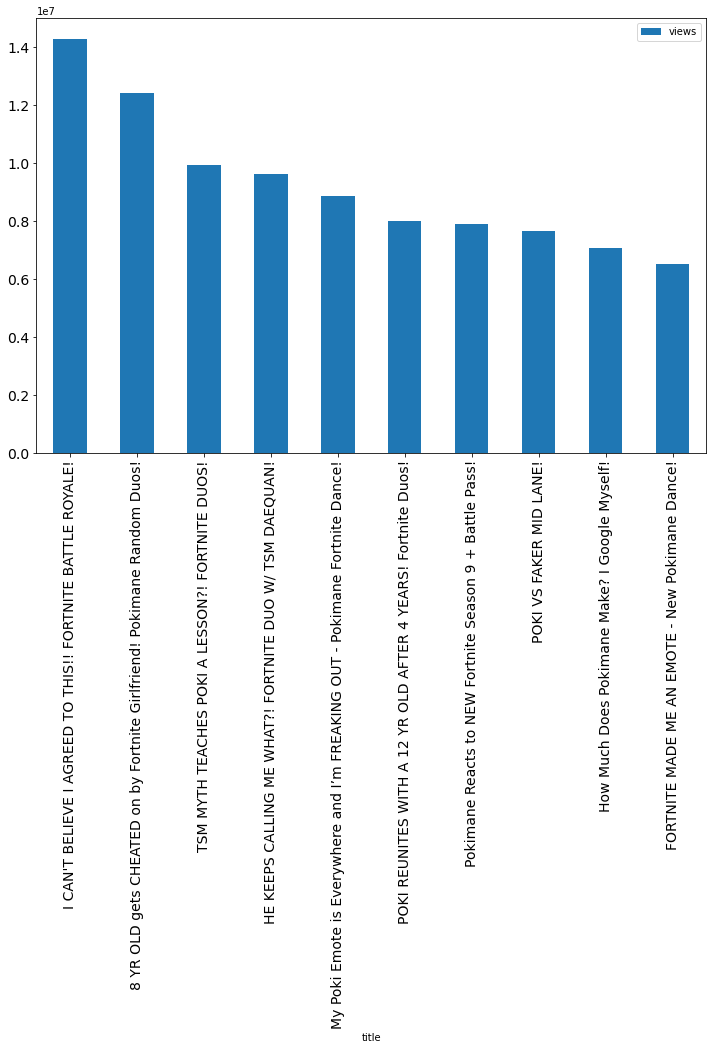

In [20]:
top10 = df.head(10)
ax = top10.plot.bar(x = 'title', y = 'views', figsize = (12,8), fontsize = 14)

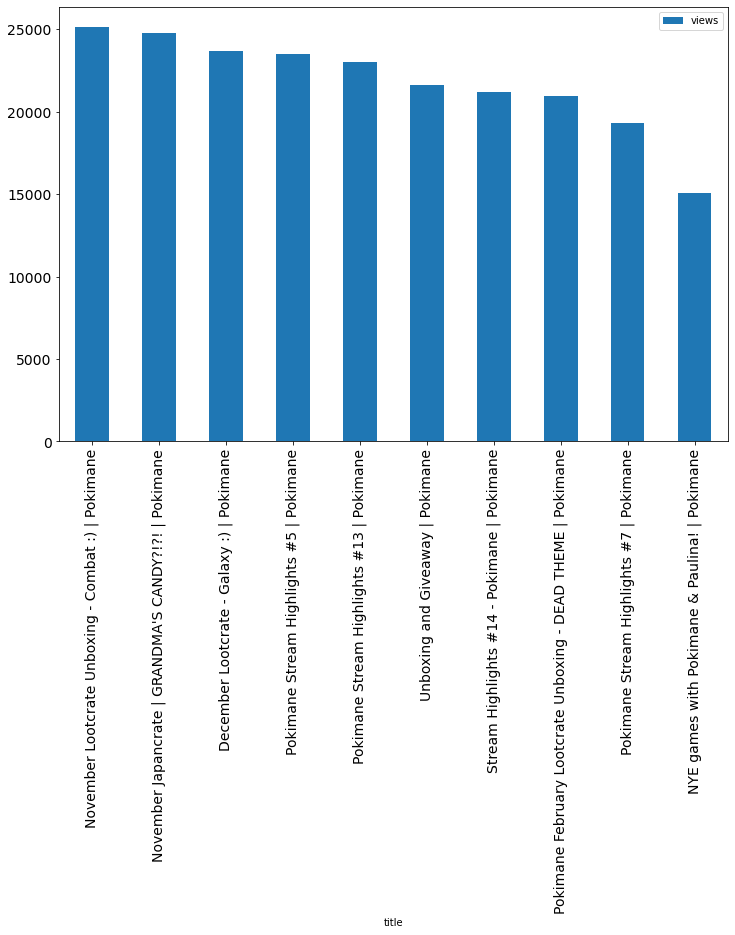

In [21]:
bottom10 = df.tail(10)
ax = bottom10.plot.bar(x = 'title', y = 'views', figsize = (12,8), fontsize = 14)

In [22]:
# likes vs dislikes
likes_avg = top10['likes'].mean()
dislikes_avg = top10['dislikes'].mean()
comments_avg = top10['comments'].mean()
print('Top 10')
print('average likes:', likes_avg)
print('average dislikes:', likes_avg)
print('average comments:', likes_avg)

likes_avg = bottom10['likes'].mean()
dislikes_avg = bottom10['dislikes'].mean()
comments_avg = bottom10['comments'].mean()
print('Bottom 10')
print('average likes:', likes_avg)
print('average dislikes:', likes_avg)
print('average comments:', likes_avg)

Top 10
average likes: 178368.3
average dislikes: 178368.3
average comments: 178368.3
Bottom 10
average likes: 527.5
average dislikes: 527.5
average comments: 527.5


In [51]:
# Analyzing Comments

# Import json file
file = 'video_comments.json'
with open (file, 'r') as f:
    comment_data = json.load(f)

# Retrieve top level comment data for analysis
retrieved_comment_data = []
videos_and_comments = comment_data.items()
for video in videos_and_comments:
    comment_info = list(video)[1]
    try:
        top_level_comment_snippet = comment_info['snippet']['topLevelComment'].get('snippet')
    except:
        top_level_comment_snippet = None
        
    if top_level_comment_snippet is not None:
        for top_level_comment in top_level_comment_snippet
        top_level_comment_id = top_level_comment_snippet['videoId']
        top_level_comment_text = top_level_comment_snippet['textDisplay']
        top_level_comment_author = top_level_comment_snippet['authorDisplayName']
        top_level_comment_likes = int(top_level_comment_snippet['likeCount'])
        top_level_comment_date = top_level_comment_snippet['publishedAt']
    retrieved_comment_data.append([top_level_comment_id, top_level_comment_text, top_level_comment_author, top_level_comment_likes, top_level_comment_date])
# Add retrieved comment data to dataframe
comment_df = pd.DataFrame(retrieved_comment_data, columns = ['ID', 'Comment', 'Author', 'Likes', 'Publish Date'])

print(comment_df)
            
            

              ID                                            Comment  \
0    NuExff4-ty4                                                yes   
1    ETBUJkVMnpc                                                 Hi   
2    k7u_zGH5QFs                                     Love u so much   
3    kjKCz56vM-4                  oooo she made her own house yayay   
4    OwNyBXGxP6g                                        TeeHeeʕ•ᴥ•ʔ   
..           ...                                                ...   
408  uAPJxe_a-l4                                            Hi poki   
409  toS1B5Du0oA                                    so funny hahaha   
410  PD_ZnlI7ozg                        Did u remember those days 😂   
411  wd3E81xs6_A  I have one question, wanna go to a movie when ...   
412  70S8Ok2bd9U                        when poki was just imane xd   

                       Author  Likes          Publish Date  
0             Lets play games      0  2020-08-18T20:06:29Z  
1    Sergio Alejandro Nar